# Analysis Plots

In this notebook, we have a look at the mean values of each feature, draw box, swarm and pairplots for every feature. Also the categorical variables are used, so sex, Academic Status and NativeSpeaker.

For this we use the whole dataset, so we also have multiple samples per person.

## Import relevant libraries

In [1]:
import numpy as np
import pandas as pd
from os import listdir
import matplotlib.pyplot as plt
import itertools as it
from statsmodels.sandbox.stats.multicomp import multipletests
#import nltk
import scipy.stats as st

import seaborn as sns
import Helper as hp

## Load .csv data with results of OpenSMILE Analysis
First we load .csv data and clean it (removing of NaNs), then we store information of all files in seperate panda dataframes containing information about affect, emotion and valence/arousal for all participants.

In [2]:
data = pd.read_csv("CHI_2019_FULL.csv")

#Set Labels for plotting
emotion_label = ['Anger', 'Boredom', 'Disgust', 'Fear', 'Happiness', 'Emo_Neutral', 'Sadness']
affect_label = ['Aggressiv', 'Cheerful', 'Intoxicated', 'Nervous', 'Aff_Neutral', 'Tired']
loi_label = ['Disinterest', 'Normal', 'High Interest']

#Get specific data and save it into new data frames
# We use the pandas .copy(deep=True) function to prevent the SettingWithCopyWarning we would otherwise get. Since we do
# not write, but only read from the data, the warning does not affect the data frames
df_emotion = data[['Anger', 'Boredom', 'Disgust', 'Fear', 'Happiness', 'Emo_Neutral', 'Sadness', 'Filename']].copy(deep=True)
df_affect = data[['Aggressiv', 'Cheerful', 'Intoxicated', 'Nervous', 'Aff_Neutral', 'Tired', 'Filename']].copy(deep=True)
df_loi = data[['Disinterest', 'Normal', 'High Interest', 'Filename']].copy(deep=True)
df_ar_val = data[['Arousal', 'Valence', 'Filename']].copy(deep=True)
#For further usage, we want to append the CharacterID as a column, which is saved with other information in the filename
#Since we only want the digits, we can remove all non-digit characters of the filename column and append the column to the df

df_emotion['Char_ID'] = df_emotion['Filename'].replace('\D+','', regex = True).copy(deep=True)
df_affect['Char_ID'] = df_affect['Filename'].replace('\D+','', regex = True).copy(deep=True)
df_loi['Char_ID'] = df_loi['Filename'].replace('\D+','', regex = True).copy(deep=True)
df_ar_val['Char_ID'] = df_ar_val['Filename'].replace('\D+','', regex = True).copy(deep=True)

## Let's load information about the speakers
The speaker ID is saved in a single .csv file containing four important columns: ID, Age, Sex and Acadedmic Status. Since before loaded OpenSMILE csv files are named using the corresponding index (ex. speaker with id 0 has two files 0_a.csv and 0_b.csv), so that a link can be created

In [3]:
char_data = pd.read_csv("CHI_2019_CharacterData.csv")  

#Join above tables and Character Tables

#To Join DataFrames we have to cast the column on which we want to join to int, so that both columns have the same data type
char_data['ID'] = char_data['ID'].astype(int)
df_ar_val['Char_ID'] = df_ar_val['Char_ID'].astype(int)
df_emotion['Char_ID'] = df_emotion['Char_ID'].astype(int)
df_affect['Char_ID'] = df_affect['Char_ID'].astype(int)
df_loi['Char_ID'] = df_loi['Char_ID'].astype(int)

#Safe new data frames
df_ar_val_char = df_ar_val.merge(char_data, how = 'left', left_on='Char_ID', right_on='ID')
df_emotion_char = df_emotion.merge(char_data, how = 'left', left_on='Char_ID', right_on= 'ID')
df_affect_char = df_affect.merge(char_data, how = 'left', left_on='Char_ID', right_on= 'ID')
df_loi_char = df_loi.merge(char_data, how = 'left', left_on='Char_ID', right_on= 'ID')

## Now let's have another look at the plots using the character data
### Let's take a look at female/male

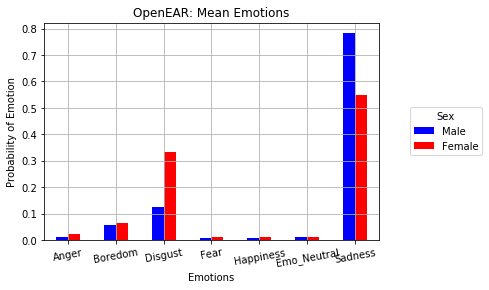

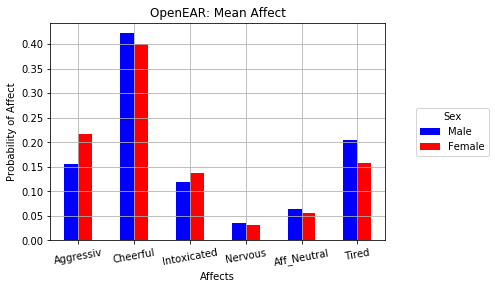

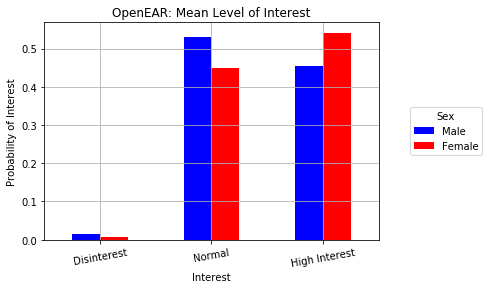

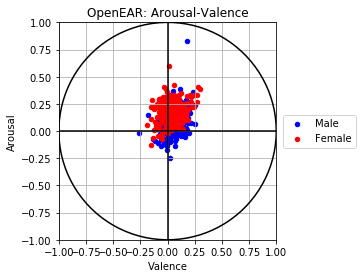

In [4]:
df_ar_val_male = df_ar_val_char.loc[df_ar_val_char['Sex'] == 'Male']
df_ar_val_female = df_ar_val_char.loc[df_ar_val_char['Sex'] == 'Female']

df_emotion_char_male = df_emotion_char.loc[df_emotion_char['Sex'] == 'Male']
df_emotion_char_female = df_emotion_char.loc[df_emotion_char['Sex'] == 'Female']

df_affect_char_male = df_affect_char.loc[df_affect_char['Sex'] == 'Male']
df_affect_char_female = df_affect_char.loc[df_affect_char['Sex'] == 'Female']

df_loi_char_male = df_loi_char.loc[df_loi_char['Sex'] == 'Male']
df_loi_char_female = df_loi_char.loc[df_loi_char['Sex'] == 'Female']

#For Plotting, lets calculate the mean emotion value for all audiofiles
df_emo_sex = hp.createMeanDataFrame([df_emotion_char_male, df_emotion_char_female],'Sex',emotion_label)
df_aff_sex = hp.createMeanDataFrame([df_affect_char_male, df_affect_char_female],'Sex',affect_label)
df_loi_sex = hp.createMeanDataFrame([df_loi_char_male, df_loi_char_female],'Sex',loi_label)

# Start with Emotion
ax_emo = df_emo_sex.plot.bar(title = 'OpenEAR: Mean Emotions',rot = 10, color = ['b','r']) #We set rotation to 10 so that the filenames can be read
ax_emo.legend(loc = 'center', bbox_to_anchor=(1.2,0.5), title = 'Sex')
ax_emo.set_ylabel('Probability of Emotion')
ax_emo.set_xlabel('Emotions')
plt.grid(True)

#Now let's plot affect bar diagram
ax_aff = df_aff_sex.plot.bar(title = 'OpenEAR: Mean Affect',rot = 10, color = ['b','r']) #We set rotation to 10 so that the filenames can be read
ax_aff.legend(loc = 'center', bbox_to_anchor=(1.2,0.5), title = 'Sex')
ax_aff.set_ylabel('Probability of Affect')
ax_aff.set_xlabel('Affects')
plt.grid(True)

#Now Level of Interest
ax_loi = df_loi_sex.plot.bar(title = 'OpenEAR: Mean Level of Interest',rot = 10, color = ['b','r']) #We set rotation to 10 so that the filenames can be read
ax_loi.legend(loc = 'center', bbox_to_anchor=(1.2,0.5), title = 'Sex')
ax_loi.set_ylabel('Probability of Interest')
ax_loi.set_xlabel('Interest')
plt.grid(True)

#And finally arousal valence
ax1 = df_ar_val_male.plot.scatter(x = 'Valence', y = 'Arousal', label = 'Male', c = 'b')
ax2 = df_ar_val_female.plot.scatter(x = 'Valence', y = 'Arousal', label = 'Female', c = 'r', ax=ax1)
#We want to plot the arousal valence circle so we create values for it
t = np.linspace(0,np.pi*2,100)
ax1.plot(np.cos(t), np.sin(t), linewidth = 1.5, color = 'black')
ax1.axvline(0,0,1, c = 'black')
x_coord = [-1.0,1.0]
y_coord = [0.0,0.0]
ax1.plot(x_coord, y_coord, c = 'black')

#Make Plot pretty
ax1.legend(loc = 'center', bbox_to_anchor=(1.2,0.5))
plt.grid(True)
plt.xlim(-1.0, 1.0)
plt.ylim(-1.0, 1.0)
plt.title('OpenEAR: Arousal-Valence')
ax1.set_aspect('equal')
plt.locator_params(axis='x',nbins= 9)

In the Emotions Plot, we can see that the most dominant emotions are sadness and disgust, where females tend to be more disgusted than sad and males more sad than disgusted. Also the mean value of the sadness of males is at ~0.79, which is by far the highest mean across all plots.

In the affect plot we see that the most dominant affection is cheerful, followed by tired and aggressive. Where females and males are almost equally cheerful, females tend to be more aggressive and less tired than males. They do not differ that much in the other three affections (intoxication, nervous, neutral). One thing to point out is the mean values of nervous: it is at about ~0.04 which is very low comparing to the other means. This hints again, that an atmosphere was given at the conference where other affections were given, rather than nervousness.

In the Level of Interest plot we can see that females tend to be slightly more interested than males. The higher 'high interest' bar and the lower 'normal' bar hints this. Disinterest is very low, which is nice for the conference.

In the last plot, we can see the arousal and valence values for each sample. We see, that females tend to have a higher arousal value, and valence does not seem to vary as much as arousal. 


### Let's have look at academic status
Bachelor and Master will be replaced with the to the video corresponding academic status

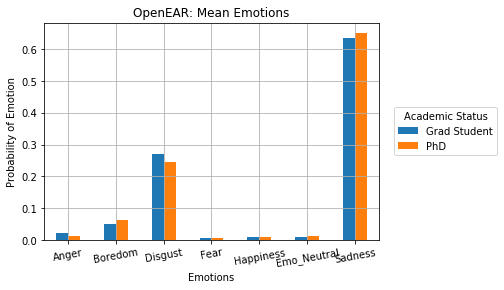

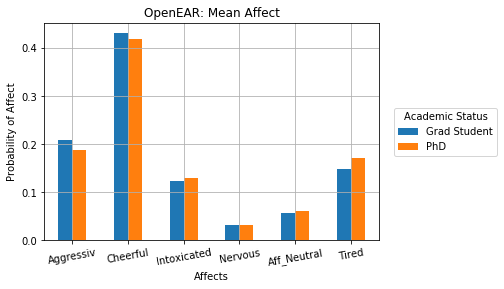

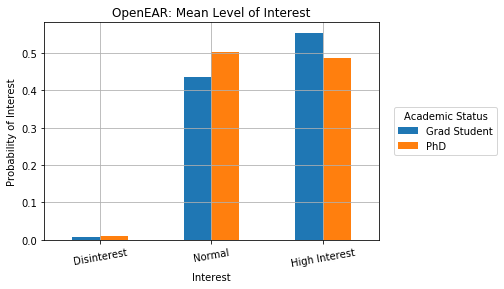

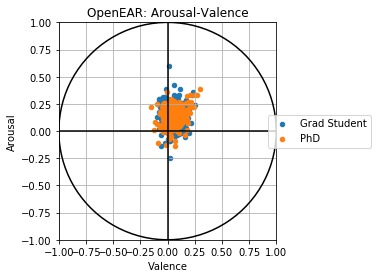

In [5]:
df_ar_val_grad = df_ar_val_char.loc[df_ar_val_char['Academic Status'] == 'Grad Student']
df_ar_val_phd = df_ar_val_char.loc[df_ar_val_char['Academic Status'] == 'PhD']

df_affect_grad = df_affect_char.loc[df_affect_char['Academic Status'] == 'Grad Student']
df_affect_phd = df_affect_char.loc[df_affect_char['Academic Status'] == 'PhD']

df_emotion_grad = df_emotion_char.loc[df_emotion_char['Academic Status'] == 'Grad Student']
df_emotion_phd = df_emotion_char.loc[df_emotion_char['Academic Status'] == 'PhD']

df_loi_grad = df_loi_char.loc[df_loi_char['Academic Status'] == 'Grad Student']
df_loi_phd = df_loi_char.loc[df_loi_char['Academic Status'] == 'PhD']

#For Plotting, lets calculate the mean emotion value for all audiofiles
df_emo_aca = hp.createMeanDataFrame([df_emotion_grad,df_emotion_phd], 'Academic', emotion_label)
df_aff_aca = hp.createMeanDataFrame([df_affect_grad,df_affect_phd], 'Academic', affect_label)
df_loi_aca = hp.createMeanDataFrame([df_loi_grad,df_loi_phd], 'Academic', loi_label)

# Start with Emotion
ax_emo1 = df_emo_aca.plot.bar(title = 'OpenEAR: Mean Emotions',rot = 10) #We set rotation to 10 so that the filenames can be read
ax_emo1.legend(loc = 'center', bbox_to_anchor=(1.2,0.5), title = 'Academic Status')
ax_emo1.set_ylabel('Probability of Emotion')
ax_emo1.set_xlabel('Emotions')
plt.grid(True)

#Now let's plot affect bar diagram
ax_aff1 = df_aff_aca.plot.bar(title = 'OpenEAR: Mean Affect',rot = 10) #We set rotation to 10 so that the filenames can be read
ax_aff1.legend(loc = 'center', bbox_to_anchor=(1.2,0.5), title = 'Academic Status')
ax_aff1.set_ylabel('Probability of Affect')
ax_aff1.set_xlabel('Affects')
plt.grid(True)

#Now plot LoI diagram
ax_loi = df_loi_aca.plot.bar(title = 'OpenEAR: Mean Level of Interest',rot = 10) #We set rotation to 10 so that the filenames can be read
ax_loi.legend(loc = 'center', bbox_to_anchor=(1.2,0.5), title = 'Academic Status')
ax_loi.set_ylabel('Probability of Interest')
ax_loi.set_xlabel('Interest')
plt.grid(True)

ax11 = df_ar_val_grad.plot.scatter(x = 'Valence', y = 'Arousal', label = 'Grad Student', c = 'tab:blue')
ax21 = df_ar_val_phd.plot.scatter(x = 'Valence', y = 'Arousal', label = 'PhD', c = 'tab:orange', ax=ax11)

#We want to plot the arousal valence circle so we create values for it
t = np.linspace(0,np.pi*2,100)
ax11.plot(np.cos(t), np.sin(t), linewidth = 1.5, color = 'black')
ax11.axvline(0,0,1, c = 'black')
x_coord = [-1.0,1.0]
y_coord = [0.0,0.0]
ax11.plot(x_coord, y_coord, c = 'black')

#Make Plot pretty
ax11.legend(loc = 'center', bbox_to_anchor=(1.2,0.5))
plt.grid(True)
plt.xlim(-1.0, 1.0)
plt.ylim(-1.0, 1.0)
plt.title('OpenEAR: Arousal-Valence')
ax11.set_aspect('equal')
plt.locator_params(axis='x',nbins= 9)

Again, sadness and disgust are the emotions with the highest means.

In the affect plot, we see that Grad Students hardly differ from PhDs -- their nervous means are almost equal.

This looks a little bit different in the Level of Interest plot: Here we see that Grad Students seem slightly more interested than PhDs, similar to females and males previously.

In the arousal valence space, there seems to be a smaller arousal for PhDs than Grad Students.


## Let's look at Native Speaker

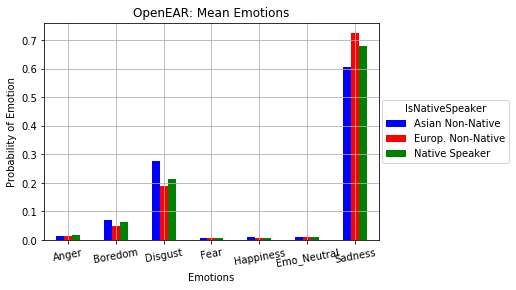

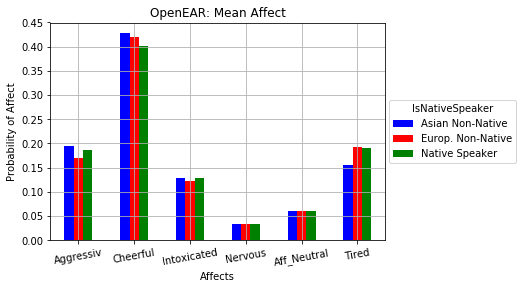

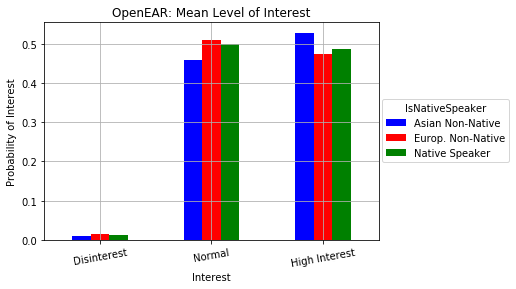

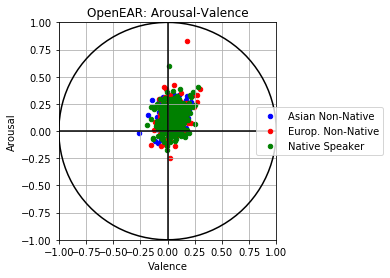

In [6]:
df_ar_val_as = df_ar_val_char.loc[df_ar_val_char['IsNativeSpeaker'] == 'Asian Non-Native']
df_ar_val_eu = df_ar_val_char.loc[df_ar_val_char['IsNativeSpeaker'] == 'Europ. Non-Native']
df_ar_val_na = df_ar_val_char.loc[df_loi_char['IsNativeSpeaker'] == 'Native Speaker']

df_emotion_char_as = df_emotion_char.loc[df_emotion_char['IsNativeSpeaker'] == 'Asian Non-Native']
df_emotion_char_eu = df_emotion_char.loc[df_emotion_char['IsNativeSpeaker'] == 'Europ. Non-Native']
df_emotion_char_na = df_emotion_char.loc[df_loi_char['IsNativeSpeaker'] == 'Native Speaker']

df_affect_char_as = df_affect_char.loc[df_affect_char['IsNativeSpeaker'] == 'Asian Non-Native']
df_affect_char_eu = df_affect_char.loc[df_affect_char['IsNativeSpeaker'] == 'Europ. Non-Native']
df_affect_char_na = df_affect_char.loc[df_loi_char['IsNativeSpeaker'] == 'Native Speaker']

df_loi_char_as = df_loi_char.loc[df_loi_char['IsNativeSpeaker'] == 'Asian Non-Native']
df_loi_char_eu = df_loi_char.loc[df_loi_char['IsNativeSpeaker'] == 'Europ. Non-Native']
df_loi_char_na = df_loi_char.loc[df_loi_char['IsNativeSpeaker'] == 'Native Speaker']

#For Plotting, lets calculate the mean emotion value for all audiofiles
df_emo_nat = hp.createMeanDataFrame([df_emotion_char_as, df_emotion_char_eu, df_emotion_char_na],'IsNativeSpeaker',emotion_label)
df_aff_nat = hp.createMeanDataFrame([df_affect_char_as, df_affect_char_eu, df_affect_char_na],'IsNativeSpeaker',affect_label)
df_loi_nat = hp.createMeanDataFrame([df_loi_char_as, df_loi_char_eu, df_loi_char_na],'IsNativeSpeaker',loi_label)

# Start with Emotion
ax_emo = df_emo_nat.plot.bar(title = 'OpenEAR: Mean Emotions',rot = 10, color = ['b','r', 'g']) #We set rotation to 10 so that the filenames can be read
ax_emo.legend(loc = 'center', bbox_to_anchor=(1.2,0.5), title = 'IsNativeSpeaker')
ax_emo.set_ylabel('Probability of Emotion')
ax_emo.set_xlabel('Emotions')
plt.grid(True)

#Now let's plot affect bar diagram
ax_aff = df_aff_nat.plot.bar(title = 'OpenEAR: Mean Affect',rot = 10, color = ['b','r', 'g']) #We set rotation to 10 so that the filenames can be read
ax_aff.legend(loc = 'center', bbox_to_anchor=(1.2,0.5), title = 'IsNativeSpeaker')
ax_aff.set_ylabel('Probability of Affect')
ax_aff.set_xlabel('Affects')
plt.grid(True)

#Now Level of Interest
ax_loi = df_loi_nat.plot.bar(title = 'OpenEAR: Mean Level of Interest',rot = 10, color = ['b','r', 'g']) #We set rotation to 10 so that the filenames can be read
ax_loi.legend(loc = 'center', bbox_to_anchor=(1.2,0.5), title = 'IsNativeSpeaker')
ax_loi.set_ylabel('Probability of Interest')
ax_loi.set_xlabel('Interest')
plt.grid(True)

#And finally arousal valence
ax1 = df_ar_val_as.plot.scatter(x = 'Valence', y = 'Arousal', label = 'Asian Non-Native', c = 'b')
ax2 = df_ar_val_eu.plot.scatter(x = 'Valence', y = 'Arousal', label = 'Europ. Non-Native', c = 'r', ax=ax1)
ax3 = df_ar_val_na.plot.scatter(x = 'Valence', y = 'Arousal', label = 'Native Speaker', c = 'g', ax=ax1)
#We want to plot the arousal valence circle so we create values for it
t = np.linspace(0,np.pi*2,100)
ax1.plot(np.cos(t), np.sin(t), linewidth = 1.5, color = 'black')
ax1.axvline(0,0,1, c = 'black')
x_coord = [-1.0,1.0]
y_coord = [0.0,0.0]
ax1.plot(x_coord, y_coord, c = 'black')

#Make Plot pretty
ax1.legend(loc = 'center', bbox_to_anchor=(1.2,0.5))
plt.grid(True)
plt.xlim(-1.0, 1.0)
plt.ylim(-1.0, 1.0)
plt.title('OpenEAR: Arousal-Valence')
ax1.set_aspect('equal')
plt.locator_params(axis='x',nbins= 9)

## Distribution Plots
We want to take a look at the distribution of our emotions, affects, level of interest and arousal-valence. So, every emotion, e.g. anger is plotted using seaborns kdeplot().

For Arousal-Valence, we'll use jointplot(kind = "kde")

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0.98,'Distribution of Arousal and Valence')

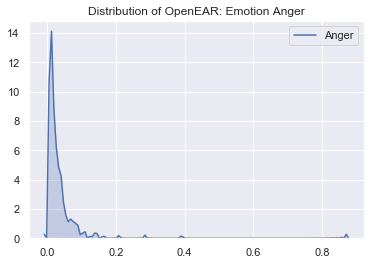

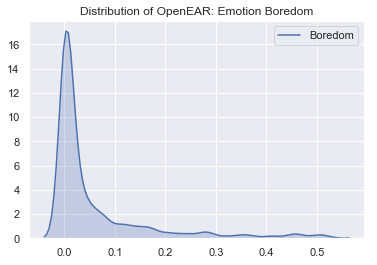

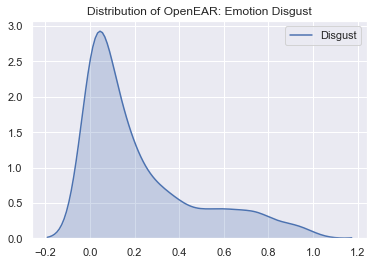

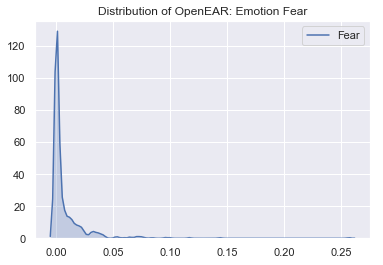

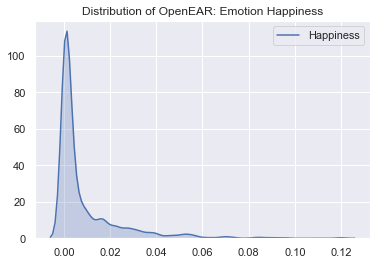

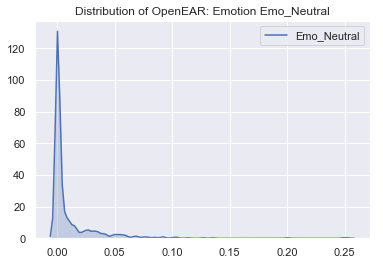

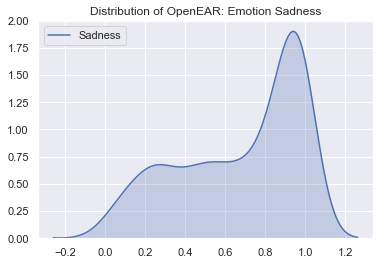

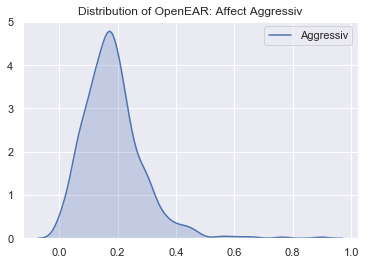

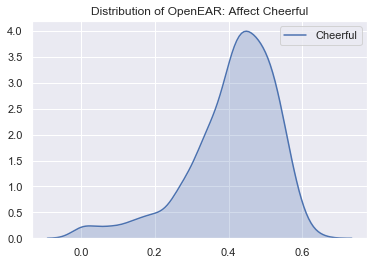

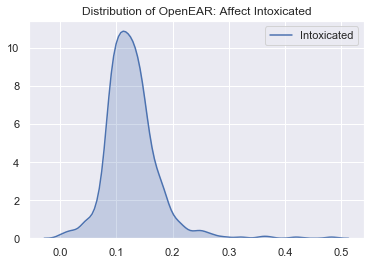

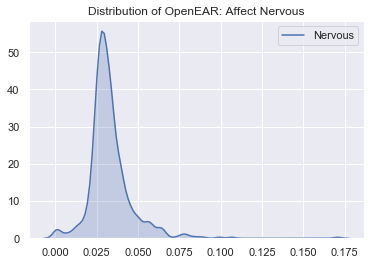

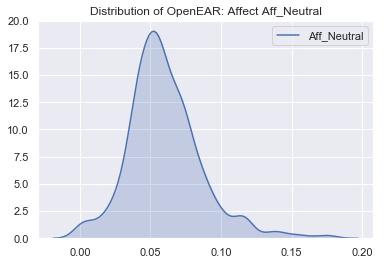

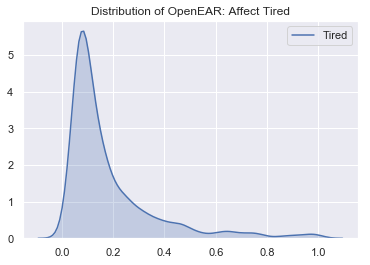

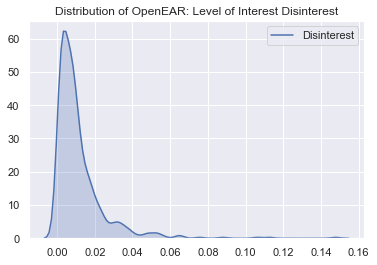

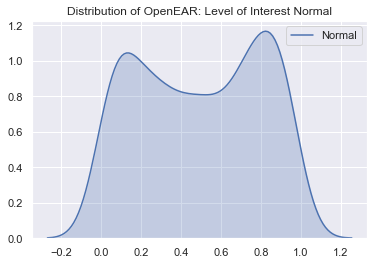

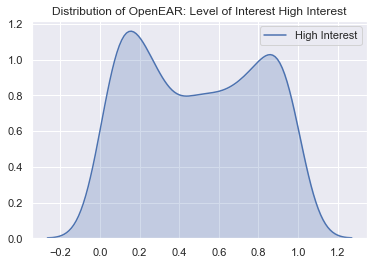

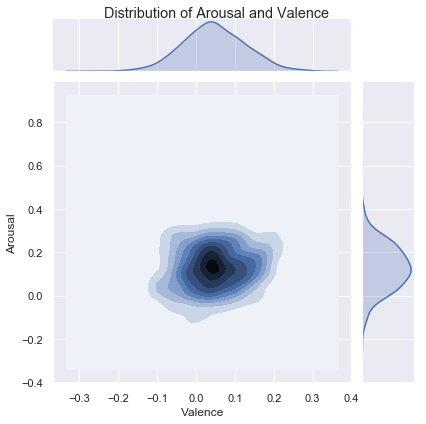

In [7]:
sns.set()
hp.distPlots(df_emotion, emotion_label, 0)
hp.distPlots(df_affect, affect_label, 1)
hp.distPlots(df_loi, loi_label, 2)
df_dis_ar_val_sex = df_ar_val_char.drop(['Char_ID','ID','Filename', 'Sex', 'Academic Status', 'IsNativeSpeaker', 'VideoID' ,'VideoTitle', 'Name'], axis = 1)
grid = sns.jointplot(x = "Valence", y = "Arousal", data = df_ar_val, kind = "kde")
ax = grid.ax_joint
grid.fig.subplots_adjust(top = 0.95)
grid.fig.suptitle('Distribution of Arousal and Valence')

If we take a look at the distribution of our different emotions, we can see that with the exception of sadness and disgust, the functions have their peak at around x = 0.01 and the distribution ends at about 0.1. Whereas disgust ranges from -0.2 to almost 1.2, which implies a wider range of values and more importantly, more higher values than other emotions. Note, that disgust has its peak roughly at 0.05, whereas the peak of the other dominating emotion, 'sadness' has its peak at ~0.9. This implies that sadness will be the most common emotion regarding high values.

If we take a look at the distribution of different affections, the distributions differ very much from the distribution of emotions. Aggressive has its peak at about 0.15 but the function is defined to x = 1, also if the probability of actually having such a value is very low. Looking at Cheerful, we see the peak at ~0.45, indicating that high cherful values are more frequently seen. The intoxication has its peak at about ~0.15 and seems to have mostly values between 0.0 and 0.3. The nervous graph is nice to have a look, because the range of values is so much smaller than the previously viewed. The peak is at ~0.025 and values are very small, as the distribution is only defined in the range 0 to 0.175, also the variance of the 'bell' is small. The neutral distribution is also defined in a smaller range (0 to 0.2) and has its peak at 0.05. Although having the peak at a smaller value, the bell of the neutral distribution has a larger variance. Tired has its peak at about 0.1 and flattens at about x = 0.6, so higher values are less likely, but can occur.

If we take a look at the distribution of disinterest, we see that the peak is at 0.005 and the maximum x-label is 0.16. We can see that disinterest values are often very very low. If we compare that to the distribution of normal interest, we see that normal interest has a much wider range. Note that the distribution is also defined x < 0 and x > 1, which in our case, does not make any sense, but tends to tell us that the values vary much. Also, in contrast to previous distribution functions, the normal interest distribution has two peaks, one at ~0.1 and a higher one at ~0.8. This can be explained by samples having e.g. a high normal interest value and therefore a smaller high interest value. The same thing goes vice versa, which explains the two peaks. Following this logic, we should also see two peaks in the distribution of high interest, which we actually do. It almost looks like the distribution of normal interest is mirrored on the y-axis.

In the last plot, the distribution of arousal and valence are shown. The center of the distribution lies in the top right of the arousal valence space (positive arousal, positive valence) and arousal values are in between -0.2 and 0.4, whereas valence values are between -0.1 and 0.2. As we have seen in the scatter plot of arousal-valence, arousal varies more than valence, which we can also see in the distribution plot.



## Swarm Plots of categorical data in relation to characteristic features

So these swarmplots are only there to get a feeling for the data, as wen can visualize each sample in a nice way, they won't be used in the analysis.

### Starting with Sex

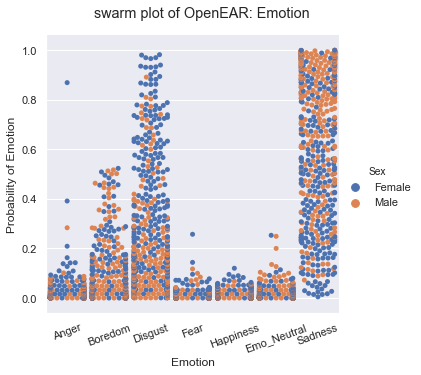

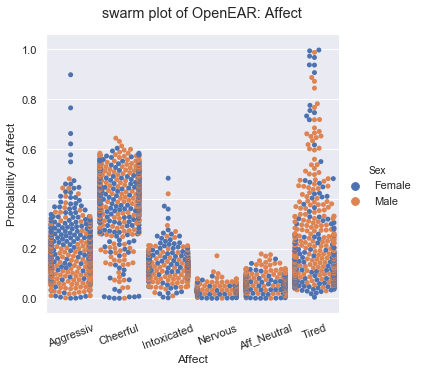

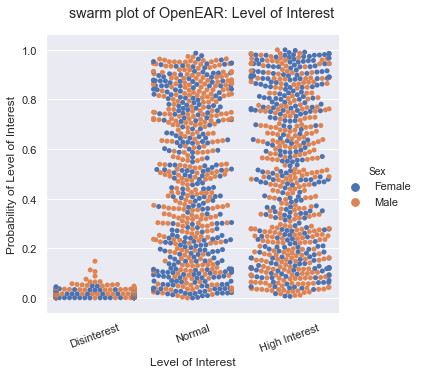

In [8]:
#Start plotting distribution of categorical data with seaborn
#e.g. emotions and sex

df_dis_emotion_sex = df_emotion_char.drop(['Char_ID','ID','Filename', 'VideoID','Academic Status','IsNativeSpeaker', 'VideoTitle', 'Name'], axis = 1)
df_dis_affect_sex = df_affect_char.drop(['Char_ID','ID','Filename', 'Academic Status', 'VideoID', 'IsNativeSpeaker','VideoTitle', 'Name'], axis = 1)
df_dis_loi_sex = df_loi_char.drop(['Char_ID','ID','Filename', 'Academic Status', 'VideoTitle','IsNativeSpeaker', 'VideoID', 'Name'], axis = 1)

hp.catPlot(df_dis_emotion_sex, 'Emotion', 'Sex', 'swarm')
plt.xticks(rotation=20)

hp.catPlot(df_dis_affect_sex, 'Affect', 'Sex', 'swarm')
plt.xticks(rotation=20)

hp.catPlot(df_dis_loi_sex, 'Level of Interest', 'Sex', 'swarm')

### Now Academic Status

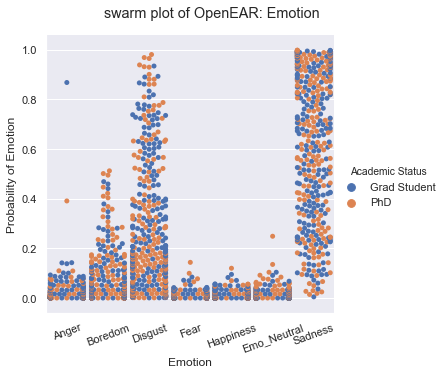

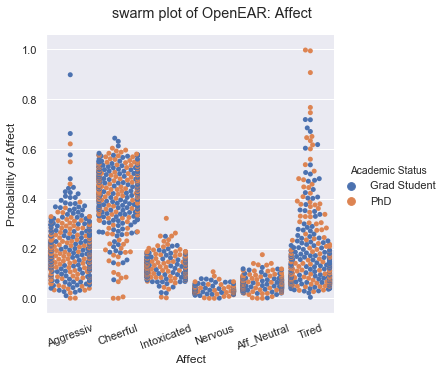

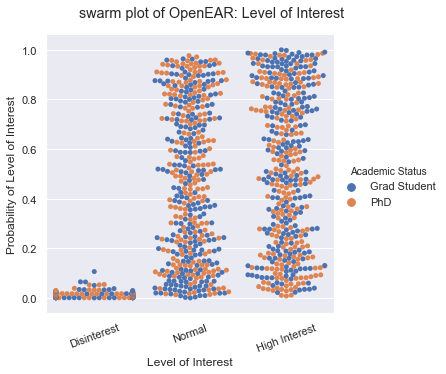

In [9]:
df_dis_emotion_aca = df_emotion_char.drop(['Char_ID','ID','Filename', 'Sex','VideoID','IsNativeSpeaker', 'VideoTitle', 'Name'], axis = 1)
hp.catPlot(df_dis_emotion_aca, 'Emotion', 'Academic Status', 'swarm')
df_dis_affect_aca = df_affect_char.drop(['Char_ID','ID','Filename', 'Sex','VideoID', 'IsNativeSpeaker','VideoTitle', 'Name'], axis = 1)
hp.catPlot(df_dis_affect_aca, 'Affect', 'Academic Status', 'swarm')
df_dis_loi_aca = df_loi_char.drop(['Char_ID','ID','Filename', 'Sex', 'VideoID','VideoTitle', 'IsNativeSpeaker','Name'], axis = 1)
hp.catPlot(df_dis_loi_aca, 'Level of Interest', 'Academic Status', 'swarm')

### Now Native Speaker

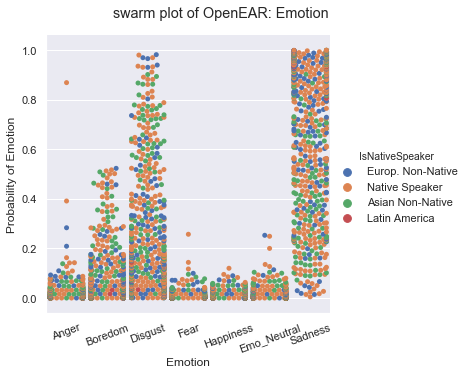

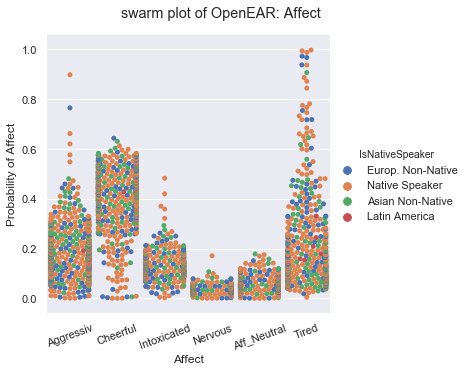

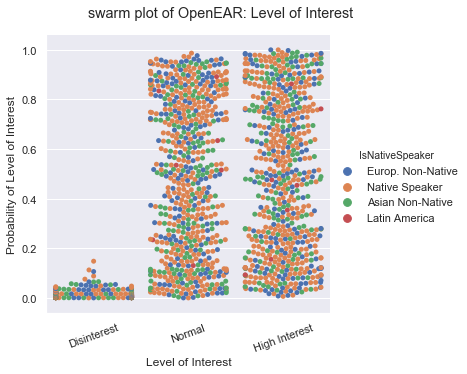

In [10]:
df_dis_emotion_nat = df_emotion_char.drop(['Char_ID','ID','Filename', 'Sex', 'VideoID','Academic Status', 'VideoTitle', 'Name'], axis = 1)
hp.catPlot(df_dis_emotion_nat, 'Emotion', 'IsNativeSpeaker', 'swarm')
df_dis_affect_nat = df_affect_char.drop(['Char_ID','ID','Filename', 'Sex', 'VideoID','Academic Status', 'VideoTitle', 'Name'], axis = 1)
hp.catPlot(df_dis_affect_nat, 'Affect', 'IsNativeSpeaker', 'swarm')
df_dis_loi_nat = df_loi_char.drop(['Char_ID','ID','Filename', 'Sex','VideoID', 'Academic Status', 'VideoTitle', 'Name'], axis = 1)
hp.catPlot(df_dis_loi_nat, 'Level of Interest', 'IsNativeSpeaker', 'swarm')

## Pairplots
### Starting with Emotions and Sex

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1.02,'Pairplot of OpenEAR: Emotions using hue = sex')

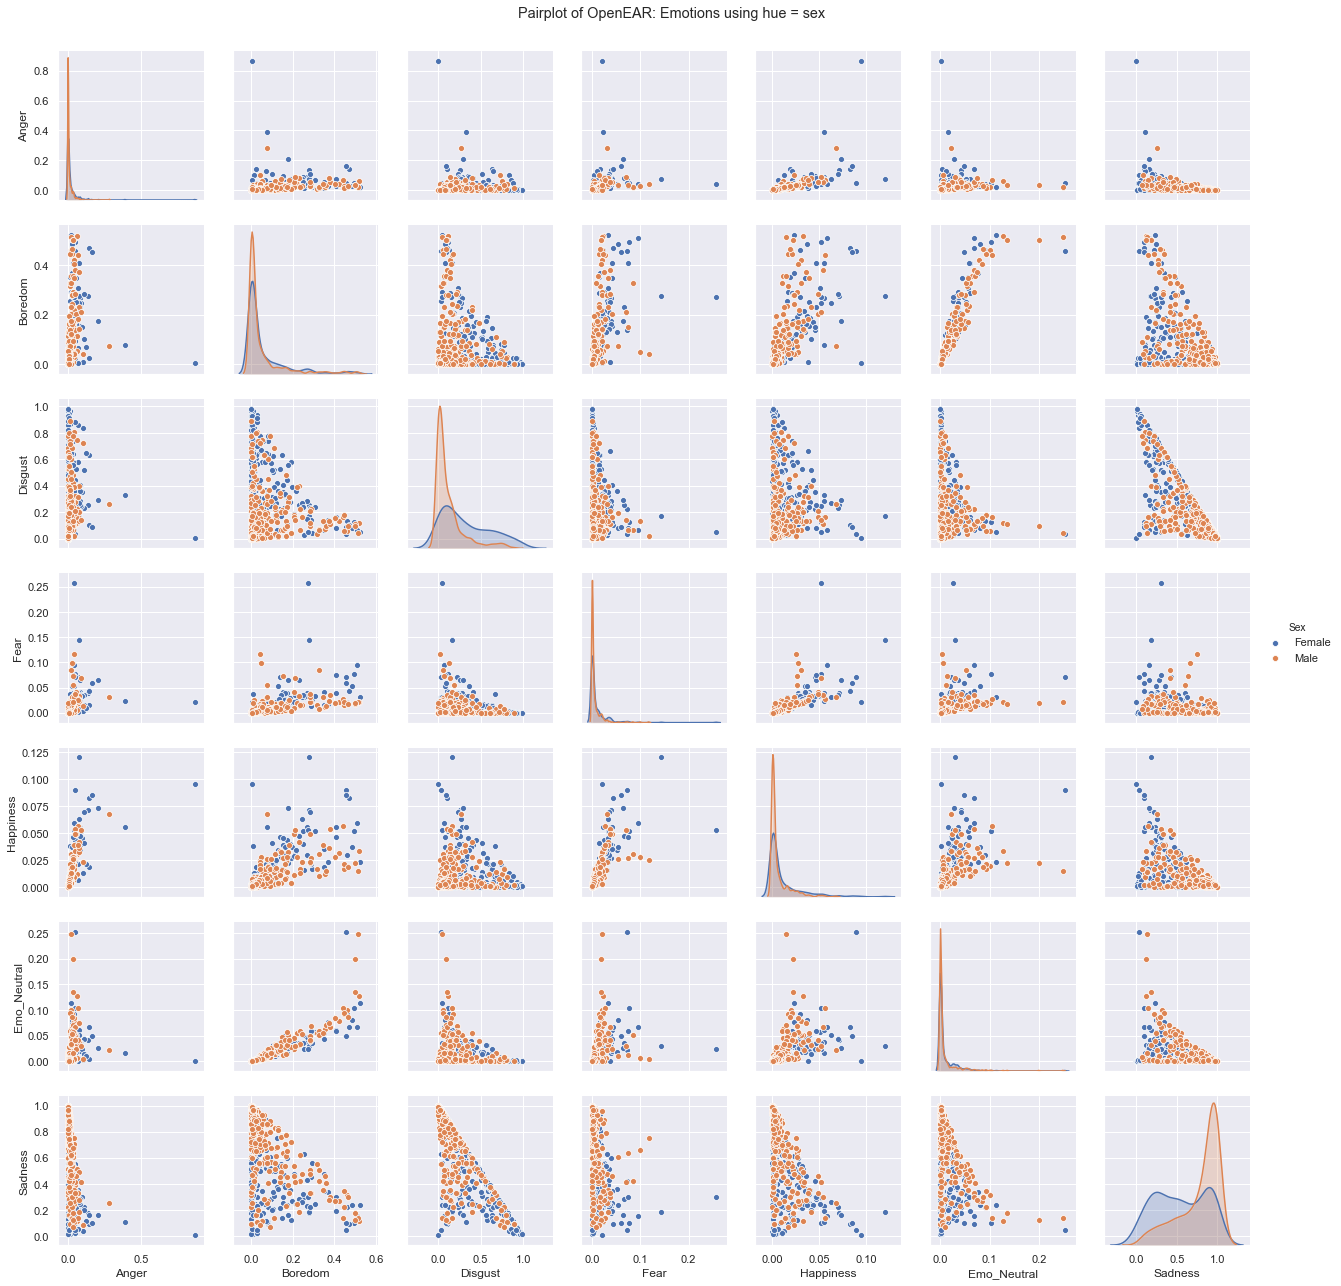

In [11]:
g = sns.pairplot(df_dis_emotion_sex, hue = "Sex")
#plt.subplots_adjust(top = 1.0)
g.fig.suptitle('Pairplot of OpenEAR: Emotions using hue = sex', y = 1.02)

The distributions of anger, fear and neutral almost seem to have no differences, whereas the peak in boredom is higher for males than females but is positiond at ~0.0 in both cases. The same goes for happiness. If we take a look at disgust however, we see that the peak for males is higher than for females, but also flats more quickly to higher x values, whereas the female distribution of disgust is much more flat. Sadness looks similar to disgust, but in contrary to before, the peak is at ~0.9 and again, the peak is higher for males than for females and the distribution of females is more constant over the x axis than males.


### Affect and Sex

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1.02,'Pairplot of OpenEAR: Affect using hue = sex')

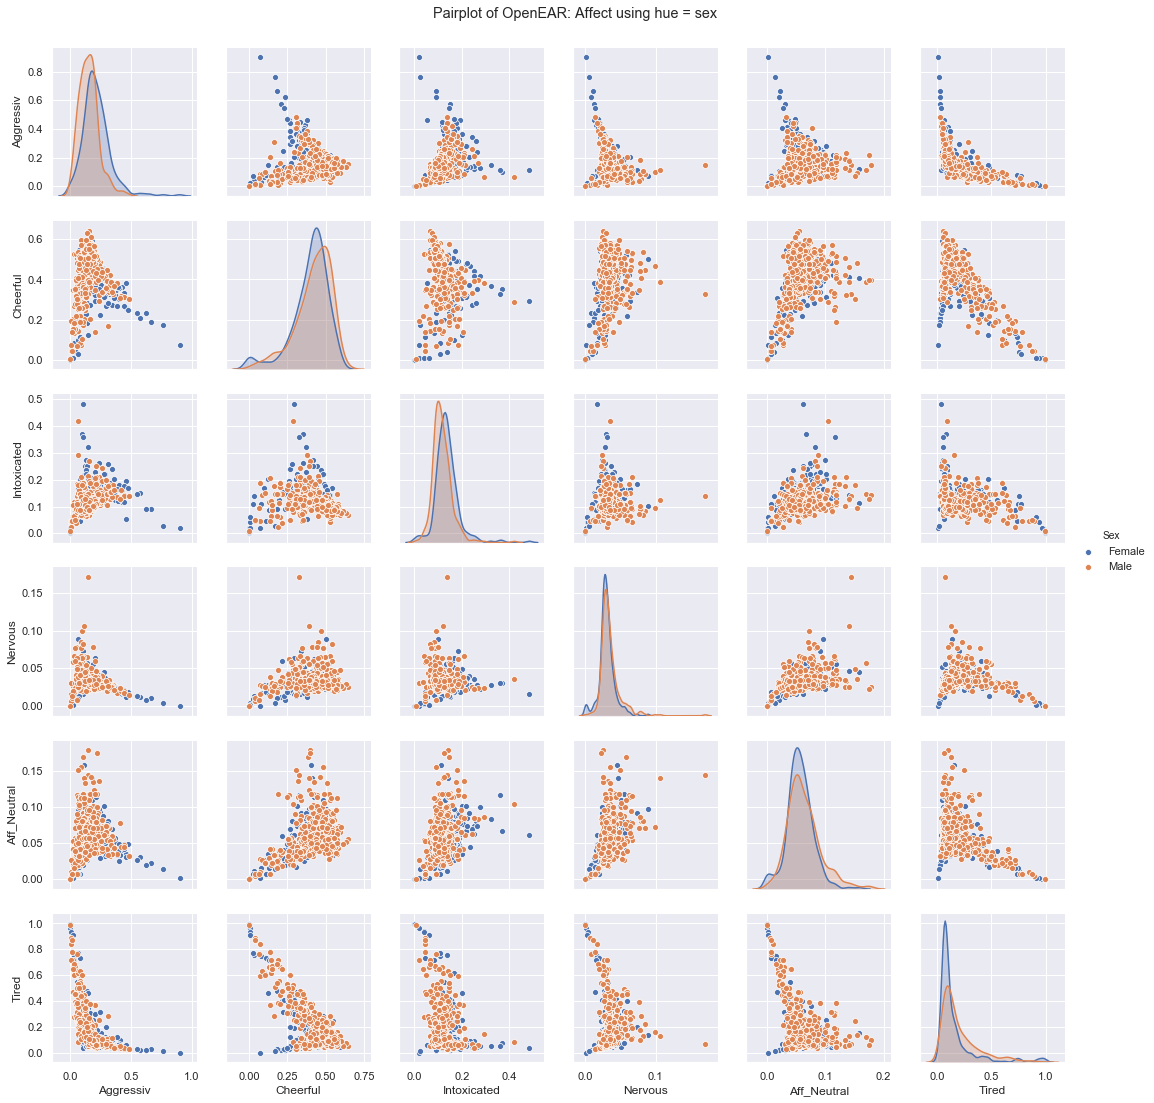

In [12]:
g = sns.pairplot(df_dis_affect_sex, hue = "Sex")
g.fig.suptitle('Pairplot of OpenEAR: Affect using hue = sex', y = 1.02)

If we take a look at the distributions of aggressiv, we see that the peak (x~=0.2) for males is slightly higher, but more to the left (smaller x-values) than the female distribution. Also, the female distribtuion extends more to higher x-values than the distribution of aggresivness in males. Looking at Cheerful, we see the opposite: Females have a higher peak which is more slightly to the left than males. Furthermore the peaks are around 0.4 which is hints that we'll see more cheerful values than e.g. aggressive values. Going further to Intoxication, we see again a slight shift in the peak position and a slight difference in the y-coordinate. As previously highlighted, the range of nervous is small when comparing to the other affect attributes. This can also be seen in the distribution, the peaks are alsmot equally high and at the same x-coordinate. Looking at neutral affect, we see that the peaks x-position is similar but the females' peak is slightly higher. Also females distribution has higher values for higher x-coordinates. If we have a look at tiredness, we see that the range is much higher than in the plots before: it ranges from 0 to 1, just as the aggressive affection. The peak for both females and males is at ~0.1 but the peak is much higher for females. Also the probability of having a higher value of tiredness is higher for males than for females, since the male distribution is higher for higher x-values.


### Level of Interest and Sex

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1.02,'Pairplot of OpenEAR: Level of Interest using hue = sex')

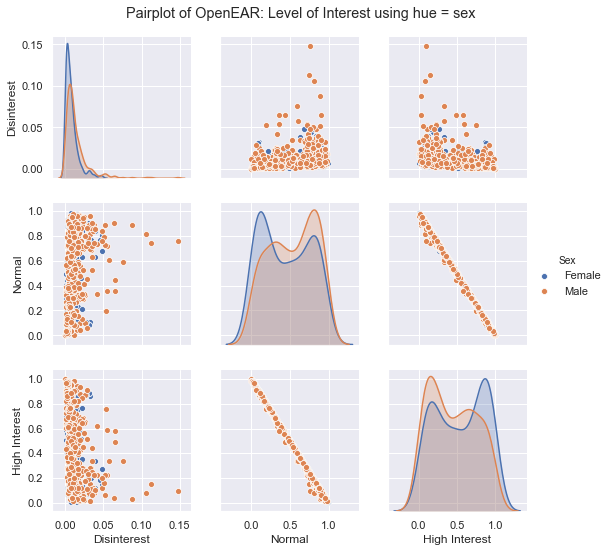

In [13]:
g = sns.pairplot(df_dis_loi_sex, hue = "Sex")
g.fig.suptitle('Pairplot of OpenEAR: Level of Interest using hue = sex', y = 1.02)

If we look at the disinterest distribution, we see that the peak for females is slightly higher (0.05), but located at the same position ~0.01. We knew already that disinterest is often not that high, so let's take a look at normal interest. Here we see quite a difference between males and females: the two distributions almost look mirrored, where males have a higher peak at a higher x-coordinate and females have a higher peak for smaller x-coordinates. Just as before, where we hypothesized that high interest will look mirrored to normal interest, this is still the case: Females have a higher peak at higher x-values than males. This hints, that females tend to be more interested than men. Furthermore, we can see that it seems that normal and high interest are linearly dependent, even if we do not account disinterest. Since the disinterest is much lower than normal and high interest, this makes sense.


### Emotions and Academic Status

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1.02,'Pairplot of OpenEAR: Emotions using hue = Academic Status')

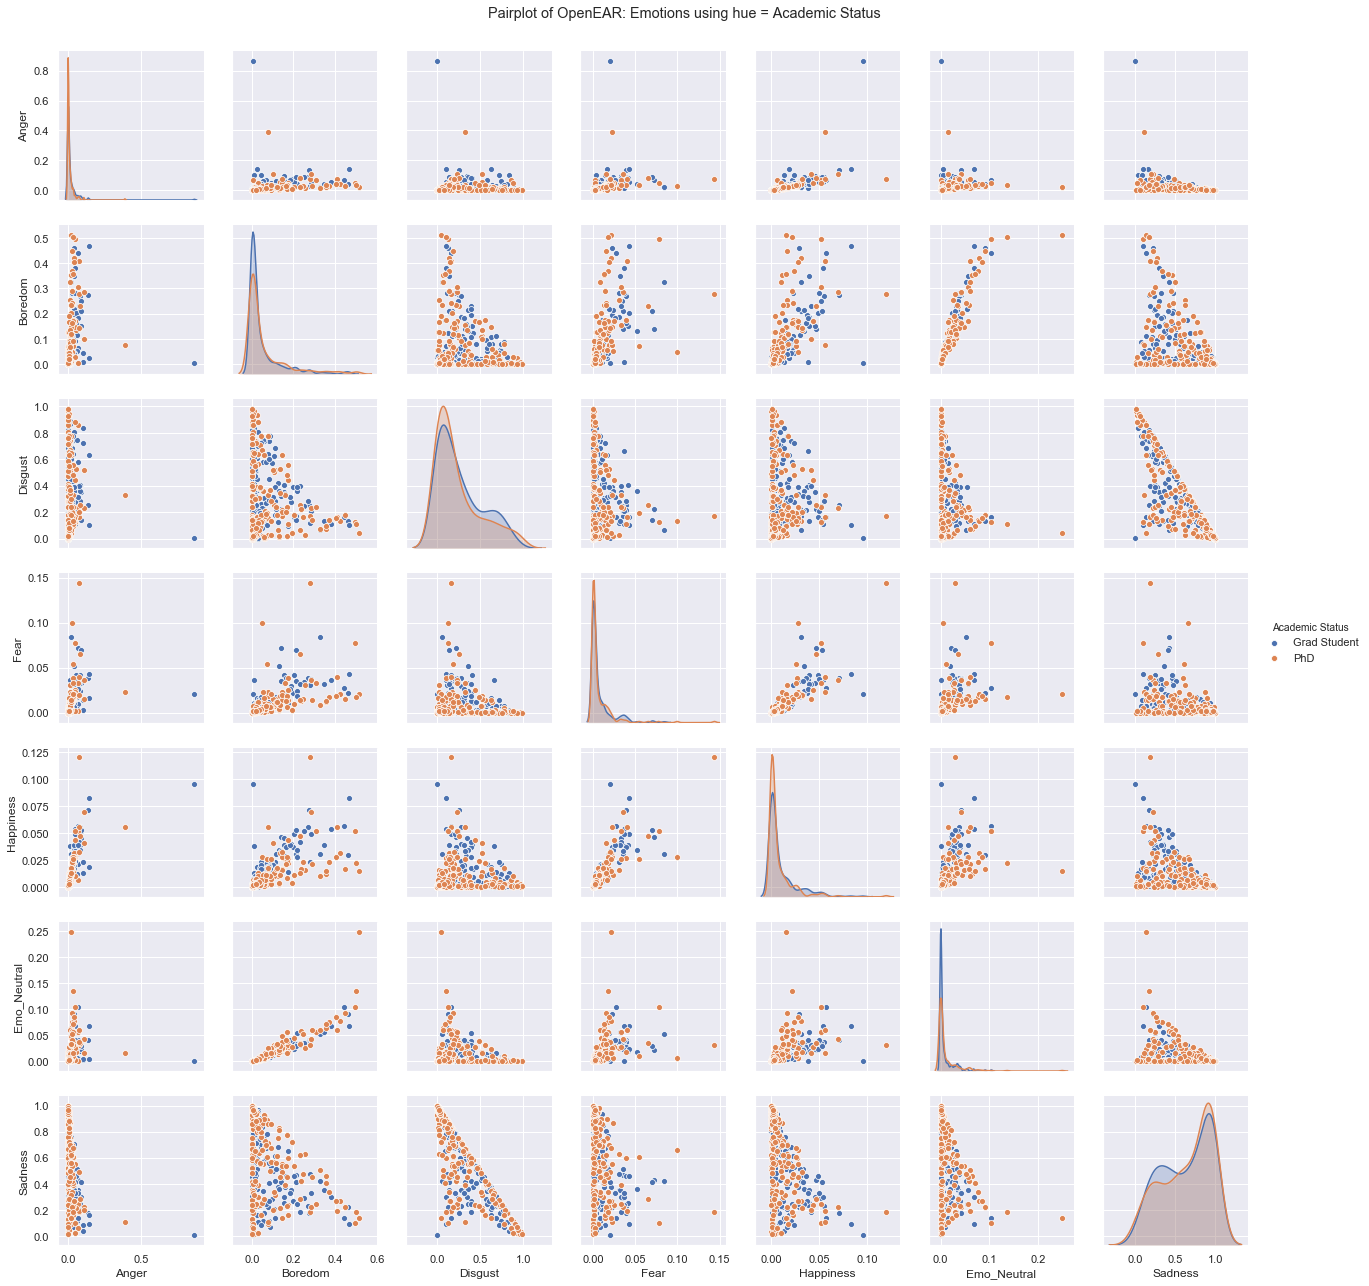

In [14]:
g = sns.pairplot(df_dis_emotion_aca, hue = "Academic Status")
g.fig.suptitle('Pairplot of OpenEAR: Emotions using hue = Academic Status', y = 1.02)

While Grad Students and PhDs do not differ much in anger, they do differ in boredom: the peak of grad students is almost 0.2 higher than the peak of PhDs. Note that both peaks are located at ~0.0. Also there are slight differences in the distribution of sigust: the PhDs have a higher peak, but the distributions flattens more quickly and does not seem to have a second local maximum, whereas the Grad Students have their highest maximum at the same position as PhDs, the distribution has a second local maximum at 0.75. For fear the distributions look quite similar, also happiness (note the scale). Grad Students have a higher peak (twice as high as PhDs) in neutrality, located at the same position as PhDs. Looking at the distribution for sadness, we see two local maxima, the highest maximum and the lowest maximum are in PhDs, hinting that PhDs have higher sadness values and Grad Students have lower sadness values, resulting in e.g. more higher values in disgust.

### Academic Status and Affect

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1.02,'Pairplot of OpenEAR: Affect using hue = Academic Status')

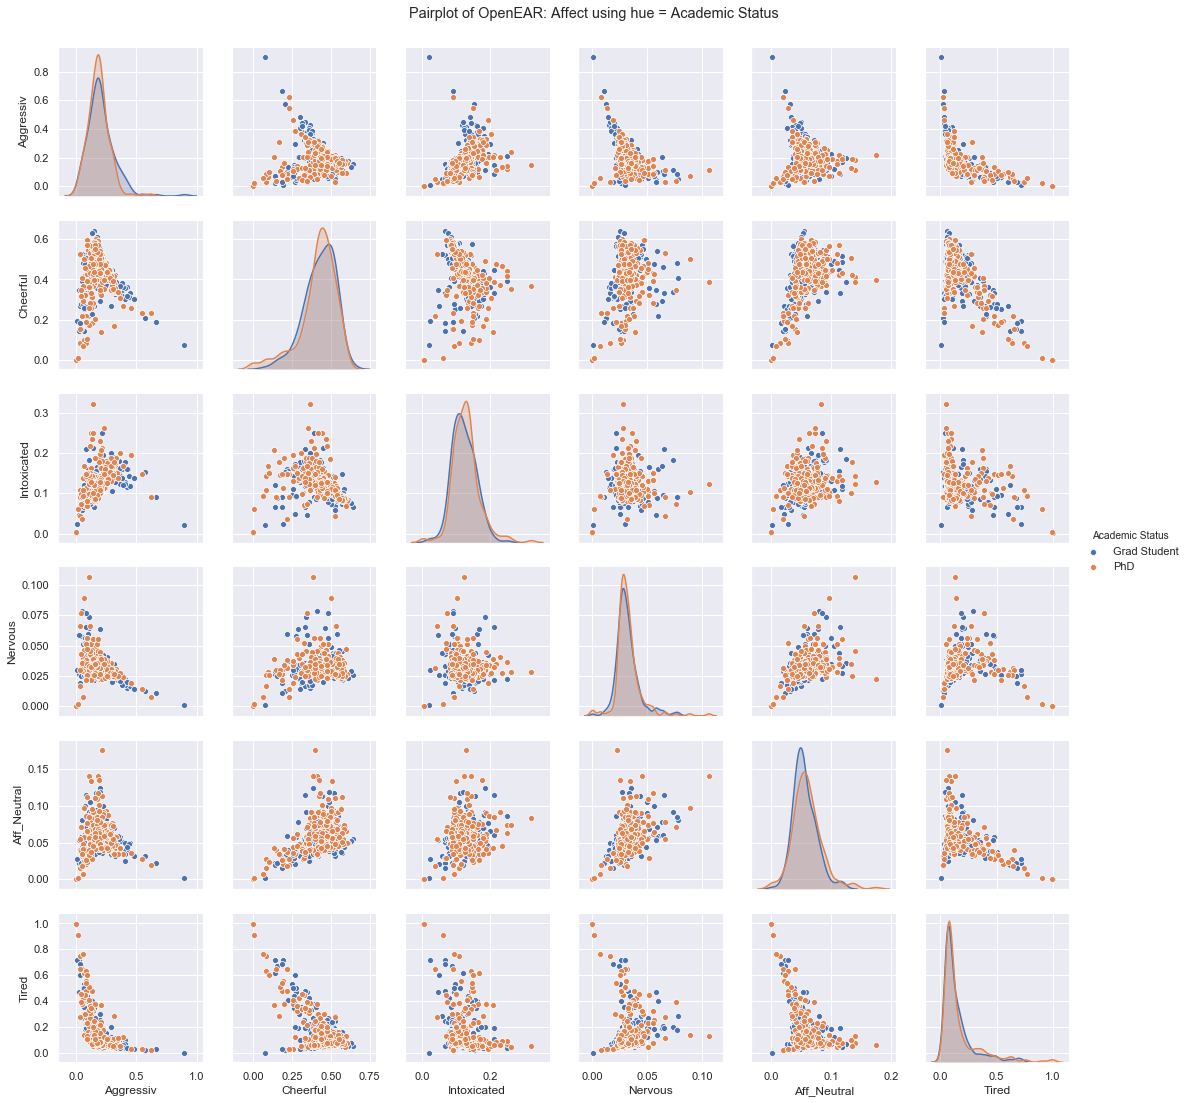

In [15]:
g = sns.pairplot(df_dis_affect_aca, hue = "Academic Status")
g.fig.suptitle('Pairplot of OpenEAR: Affect using hue = Academic Status', y = 1.02)

In General PhDs have higher peaks at aggressive, cheerful, intoxication and nervous. The peak of the distribution of aggresive values of PhDs is at ~0.25. Whereas PhDs have the higher peak, the distribution flattens more quickly for PhDs. The distribution of tiredness and nervousness are quite similar for PhDs and Grad Students.


### Level of Interest and Academic Status

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1.02,'Pairplot of OpenEAR: Level of Interest using hue = Academic Status')

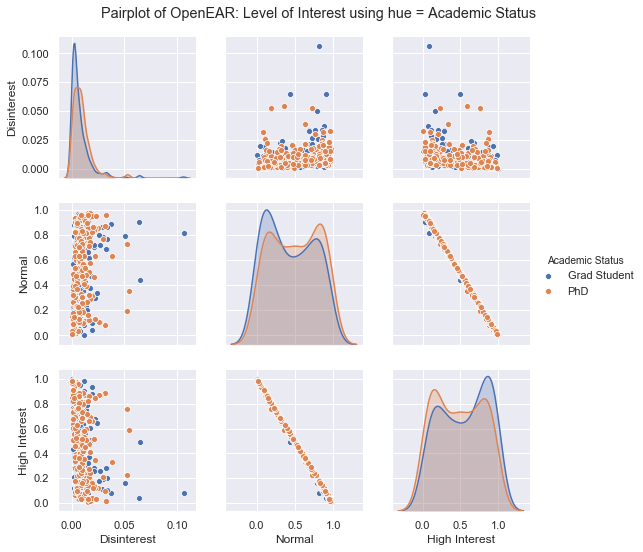

In [16]:
g = sns.pairplot(df_dis_loi_aca, hue = "Academic Status")
g.fig.suptitle('Pairplot of OpenEAR: Level of Interest using hue = Academic Status', y = 1.02)

In the disinterest distribution we see that Grad Students have a slightly higher peak at ~0.0 with a low variance of the 'bell', whereas PhDs have a slightly wider bell with its peak located at ~0.01. Seeing the scale of the plot, we see these differences, which are tiny. So again for normal and high interest, we assume (disinterest being so small) that the distributions will be mirrored, which is also the case: In the normal interest distribution PhDs have a slightly higher peak at x~=0.75 than Grad Students, but Grad Students have a higher peak at x~=0.2. This implies that for high interest, there will be a peak of Grad Students at x=0.75.

### Emotion and Native Speaker

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1.02,'Pairplot of OpenEAR: Emotions using hue = IsNativeSpeaker')

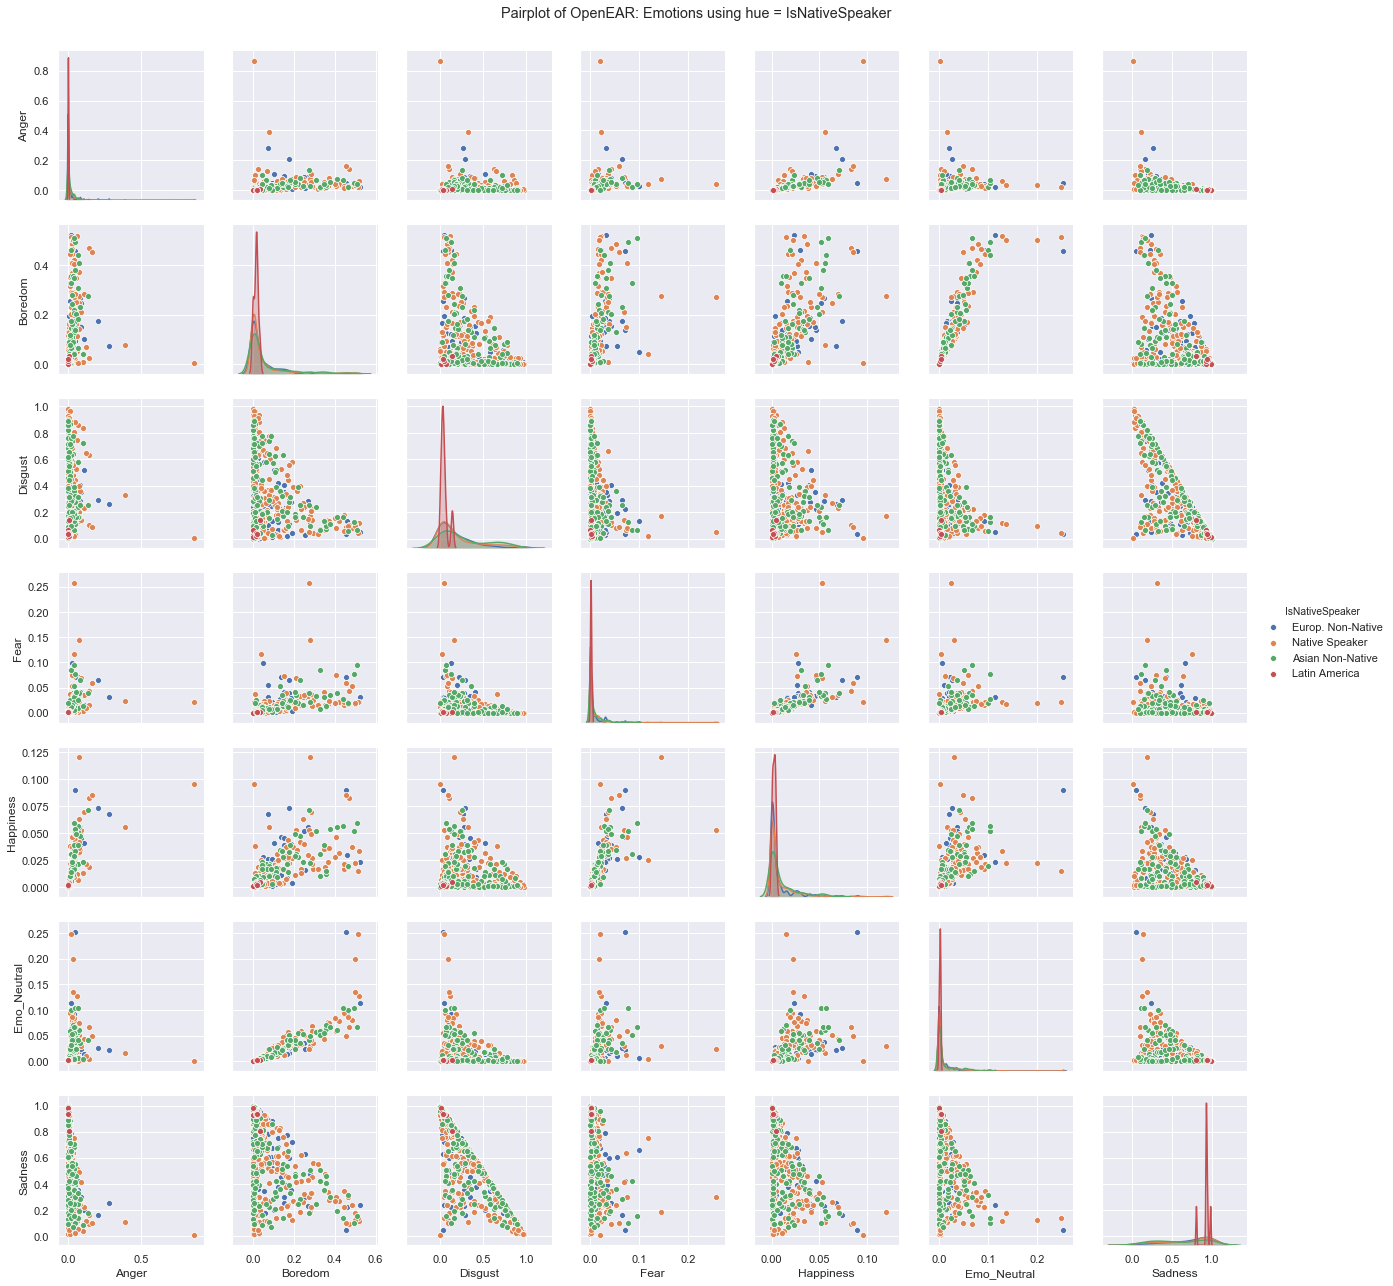

In [17]:
g = sns.pairplot(df_dis_emotion_nat, hue = "IsNativeSpeaker")
g.fig.suptitle('Pairplot of OpenEAR: Emotions using hue = IsNativeSpeaker', y = 1.02)

### Affect and Native Speaker

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1.02,'Pairplot of OpenEAR: Emotions using hue = IsNativeSpeaker')

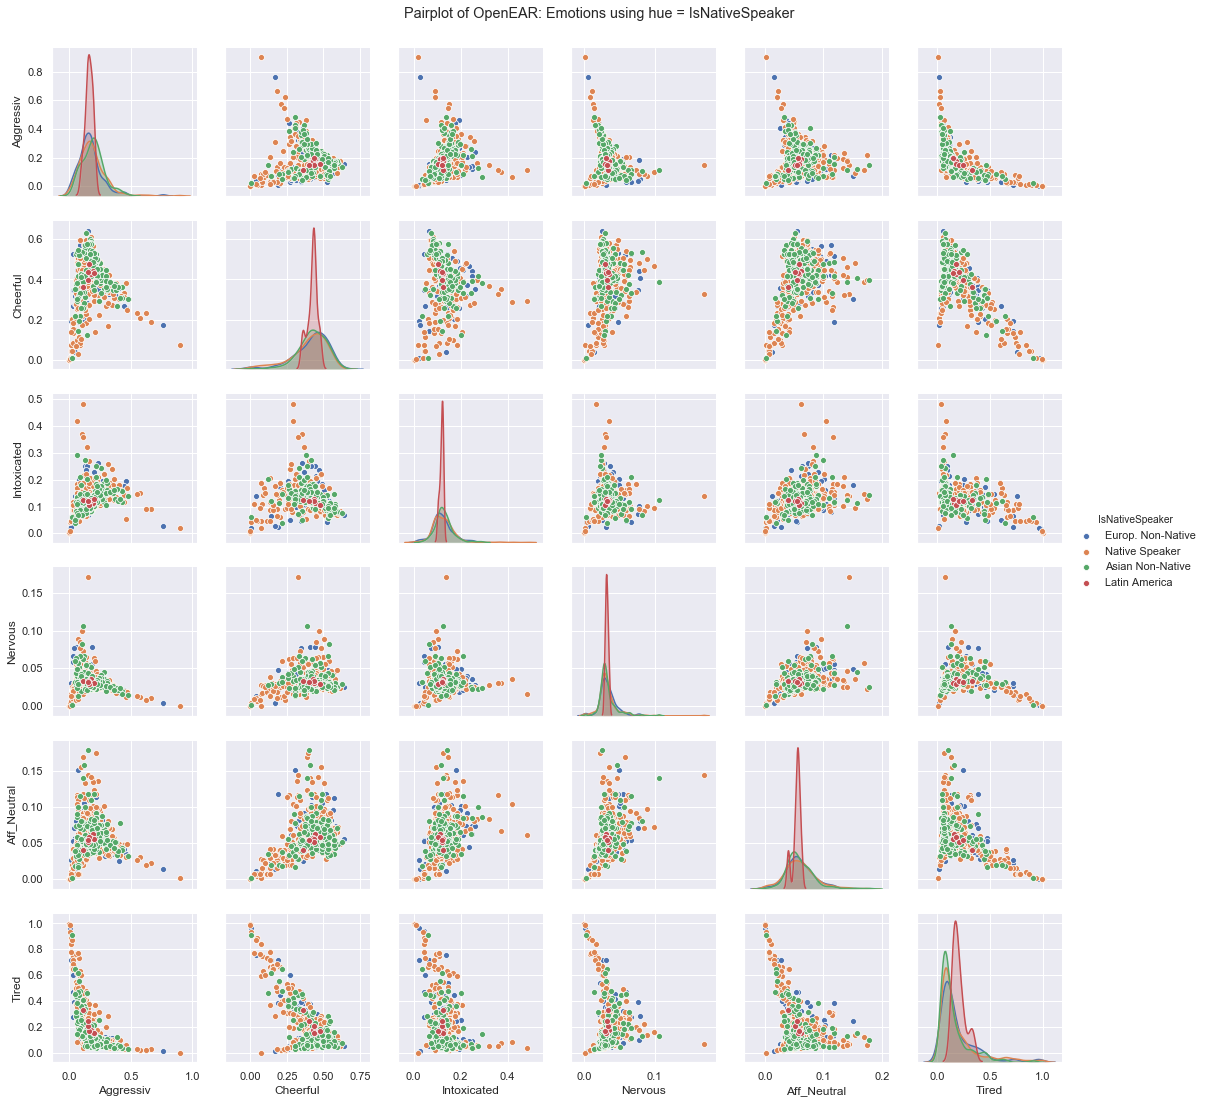

In [18]:
g = sns.pairplot(df_dis_affect_nat, hue = "IsNativeSpeaker")
g.fig.suptitle('Pairplot of OpenEAR: Emotions using hue = IsNativeSpeaker', y = 1.02)

### Level of Interest and Native Speaker

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1.02,'Pairplot of OpenEAR: Emotions using hue = IsNativeSpeaker')

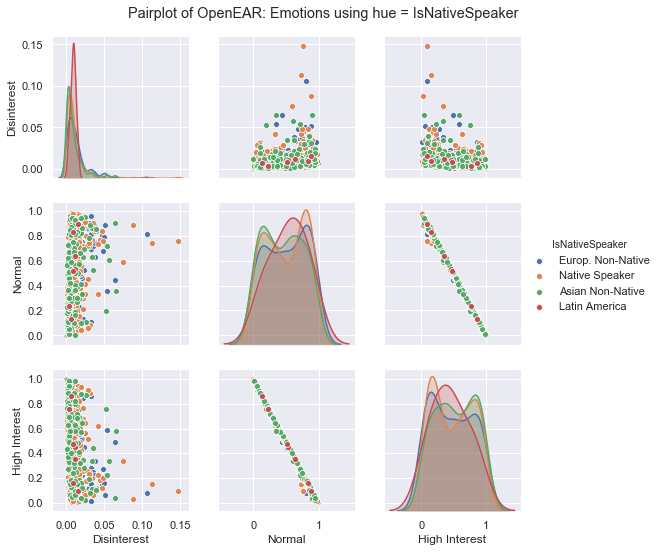

In [19]:
g = sns.pairplot(df_dis_loi_nat, hue = "IsNativeSpeaker")
g.fig.suptitle('Pairplot of OpenEAR: Emotions using hue = IsNativeSpeaker', y = 1.02)

## Box Plots
### Start with Sex

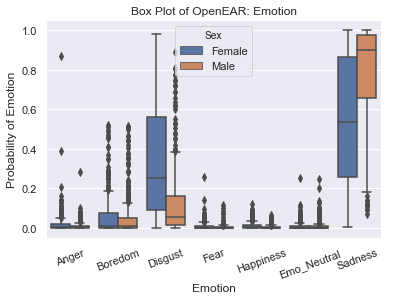

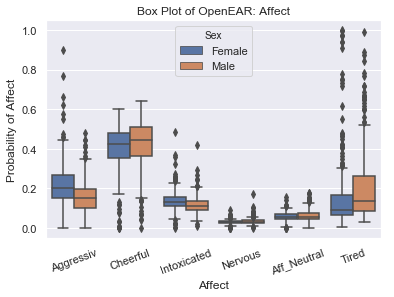

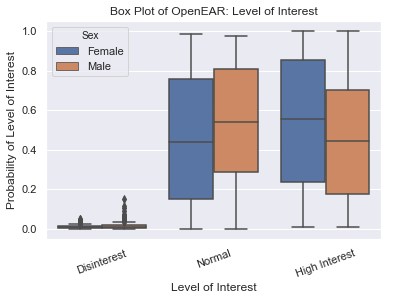

<Figure size 432x288 with 0 Axes>

In [20]:
hp.boxPlots([df_dis_emotion_sex,df_dis_affect_sex, df_dis_loi_sex], 'Sex', ['Emotion', 'Affect', 'Level of Interest'])

### Go on with Academic Status

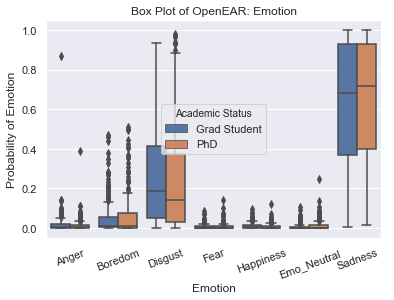

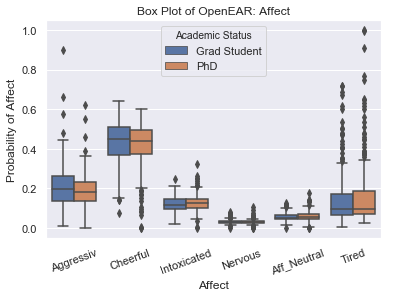

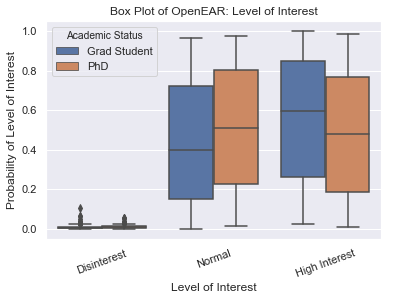

<Figure size 432x288 with 0 Axes>

In [21]:
hp.boxPlots([df_dis_emotion_aca,df_dis_affect_aca, df_dis_loi_aca], 'Academic Status', ['Emotion', 'Affect', 'Level of Interest'])

### Go on with Native Speaker

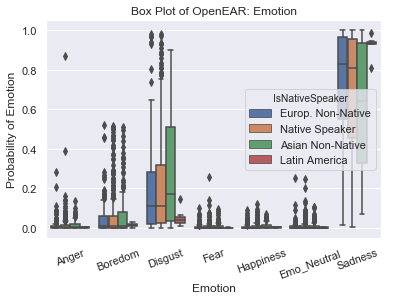

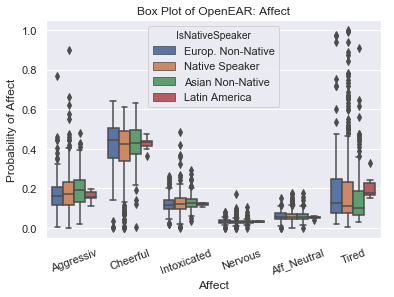

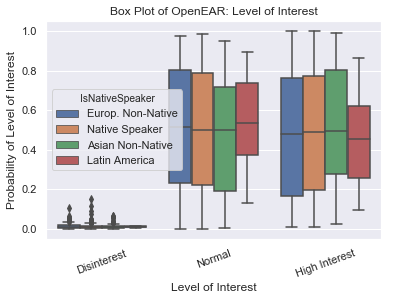

<Figure size 432x288 with 0 Axes>

In [22]:
hp.boxPlots([df_dis_emotion_nat,df_dis_affect_nat, df_dis_loi_nat], 'IsNativeSpeaker', ['Emotion', 'Affect', 'Level of Interest'])